## Importing Libraries

In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import cophenet,linkage,dendrogram

from sklearn.cluster import DBSCAN

## Reading Data

In [6]:
data=pd.read_excel('C:/Users/nehal/Music/9.Machine Learning 3/Faculty Notebook/purchase.xlsx',engine='openpyxl')
data.head()

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


## Understanding Data

### Check the Data Type

In [8]:
data.dtypes

Products                object
Prod_id                 object
Cust_id                 object
Sales                  float64
Order_Quan               int64
Profit                 float64
Shipping_Cost          float64
Product_Base_Margin    float64
Customer_Segment        object
dtype: object

## Removing insignificant variables

In [14]:
for x in data.select_dtypes('object'):
    print(x)
    print(len(data[x].value_counts()),'\n')

Products
12 

Prod_id
12 

Cust_id
1674 

Customer_Segment
3 



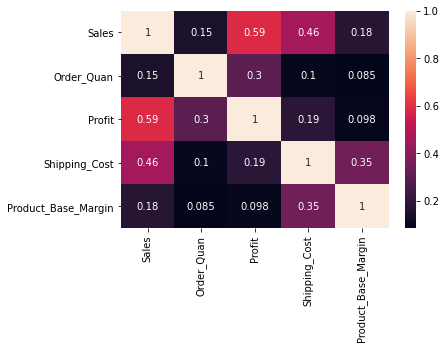

In [18]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [20]:
data.drop(['Cust_id','Products'],axis=1,inplace=True)
data.head()

,Prod_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,Prod_16,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,Prod_16,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,Prod_6,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,Prod_6,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,Prod_17,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


## Outlier treatment

<AxesSubplot:>

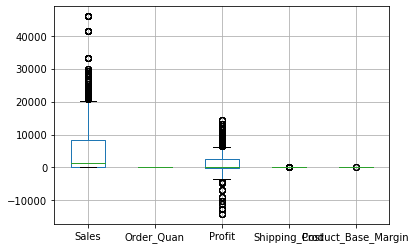

In [21]:
data.boxplot()

In [23]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

df=data[~((data < (q1-(1.5*IQR)))|(data>(q3+(1.5*IQR)))).any(axis=1)] 

<AxesSubplot:>

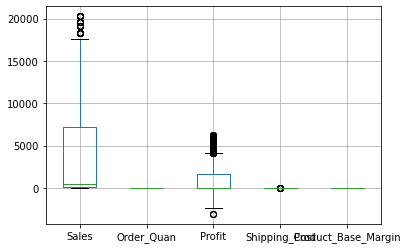

In [24]:
df.boxplot()

## Missing Value Analysis

In [25]:
df.isnull().sum()

Prod_id                0
Sales                  0
Order_Quan             0
Profit                 0
Shipping_Cost          0
Product_Base_Margin    0
Customer_Segment       0
dtype: int64

### Splitting categorical and numerical variables

In [30]:
data_cat=df.select_dtypes('object')
data_num=df.select_dtypes(exclude='object')

## Scaling Data

In [49]:
scale=StandardScaler()
data_scaled=pd.DataFrame(scale.fit_transform(data_num),columns=data_num.columns)
data_scaled.head()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin
0,1.688612,0.870458,1.134118,1.060572,0.626189
1,1.620900,-0.038853,1.370695,1.232354,0.552718
2,-0.588257,-1.018112,-0.561488,-0.270991,-0.843235
3,-0.629063,-0.388588,-0.520203,-0.058550,-0.696292
4,1.513502,1.569928,2.784204,0.908103,-0.916706


## Encoding

In [39]:
data_encoded=pd.get_dummies(data_cat)
data_encoded.head()

,Prod_id_Prod_1,Prod_id_Prod_11,Prod_id_Prod_12,Prod_id_Prod_13,Prod_id_Prod_16,Prod_id_Prod_17,Prod_id_Prod_3,Prod_id_Prod_4,Prod_id_Prod_6,Prod_id_Prod_7,Prod_id_Prod_8,Prod_id_Prod_9,Customer_Segment_CORPORATE,Customer_Segment_HOME OFFICE,Customer_Segment_SMALL BUSINESS
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [41]:
df_final=pd.concat([data_scale,data_encoded],axis=1)
df_final.head()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Prod_id_Prod_1,Prod_id_Prod_11,Prod_id_Prod_12,Prod_id_Prod_13,Prod_id_Prod_16,Prod_id_Prod_17,Prod_id_Prod_3,Prod_id_Prod_4,Prod_id_Prod_6,Prod_id_Prod_7,Prod_id_Prod_8,Prod_id_Prod_9,Customer_Segment_CORPORATE,Customer_Segment_HOME OFFICE,Customer_Segment_SMALL BUSINESS
0,1.688612,0.870458,1.134118,1.060572,0.626189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.620900,-0.038853,1.370695,1.232354,0.552718,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.588257,-1.018112,-0.561488,-0.270991,-0.843235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.629063,-0.388588,-0.520203,-0.058550,-0.696292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.513502,1.569928,2.784204,0.908103,-0.916706,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Hierarchial Clustering

In [43]:
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram

#### Prerequisites to build the model

#### Linkage methods
It represents the distance between the clusters based on the given linkage method. There are several linkage methods like single, complete, average, centroid ward. Here we use the ward linkage to calculate the linkage matrix.

In [53]:
link_mat=linkage(data_scaled,method='ward')
link_mat

array([[1.11300000e+03, 1.25300000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.90300000e+03, 5.19200000e+03, 0.00000000e+00, 3.00000000e+00],
       [1.13300000e+03, 2.14600000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.03780000e+04, 1.03790000e+04, 6.14321894e+01, 3.45900000e+03],
       [1.03730000e+04, 1.03770000e+04, 6.34427700e+01, 1.73300000e+03],
       [1.03800000e+04, 1.03810000e+04, 1.55836959e+02, 5.19200000e+03]])

#### Dendrogram

1) x-axis contains the observations and the y-axis contains the distances computed using the 'ward' method.

2) Horizontal lines show the merging of the clusters.

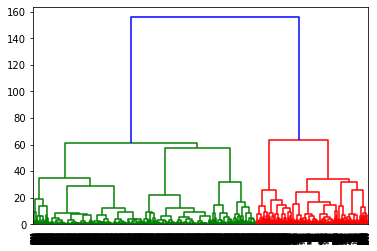

In [55]:
dendro=dendrogram(link_mat)
plt.show()

#### Cophenetic Score

**Interpretation:** The value of cophenetic correlation coefficient is 0.7772. The value close to 1 indicates the best linkage quality. Here we can say that the linkage quality is good.

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AgglomerativeClustering()

### Agglomerative Clustering

Agglomerative Clustering: Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). ... Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

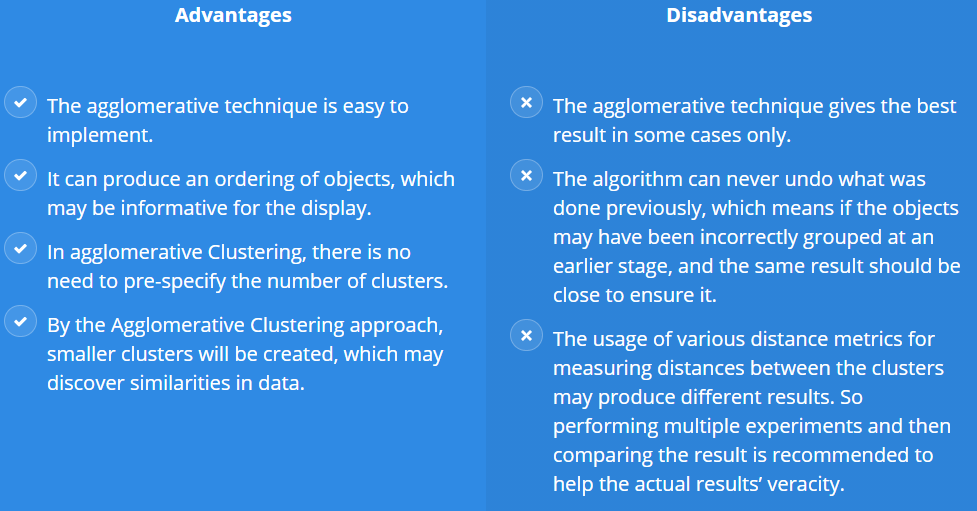

In [57]:
model=AgglomerativeClustering(n_clusters=2,linkage='ward')
model.fit(data_scaled)

data_scaled['cluster']=model.labels_

In [58]:
data_scaled['cluster'].value_counts()

1    3459
0    1733
Name: cluster, dtype: int64

In [59]:
data_num['cluster']=model.labels_
data_num.head()

c:\users\nehal\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,cluster
0,10909.641,40,2616.46,22.00,0.57,0
1,10607.641,27,2977.36,23.69,0.56,0
2,754.641,13,29.80,8.90,0.37,1
3,572.641,22,92.78,10.99,0.39,1
4,10128.641,50,5133.68,20.50,0.36,0


In [63]:
data_num[data_num.cluster==0].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,cluster
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.0
mean,8854.202957,32.787074,2513.388575,22.603312,0.592845,0.0
std,3412.481083,12.444343,1625.736002,6.892565,0.124358,0.0
min,50.190000,7.000000,-1331.550000,5.000000,0.350000,0.0
25%,7131.641000,22.000000,1389.180000,18.250000,0.550000,0.0
50%,8646.641000,33.000000,2860.710000,21.210000,0.580000,0.0
75%,10474.641000,43.000000,3461.590000,25.000000,0.660000,0.0
max,20265.220000,58.000000,6279.180000,46.200000,0.850000,0.0


In [64]:
data_num[data_num.cluster==1].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,cluster
count,3459.000000,3459.000000,3459.000000,3459.000000,3459.000000,3459.0
mean,634.822022,24.934374,71.191026,6.036210,0.430624,1.0
std,1215.828643,14.447429,423.035589,5.466886,0.106220,0.0
min,3.420000,1.000000,-3061.820000,0.490000,0.350000,1.0
25%,82.030000,12.000000,-47.150000,1.490000,0.370000,1.0
50%,192.580000,25.000000,-1.060000,5.270000,0.380000,1.0
75%,495.825000,37.000000,55.650000,7.780000,0.440000,1.0
max,10791.380000,50.000000,2595.180000,26.000000,0.850000,1.0


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

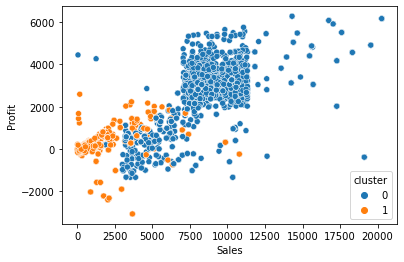

In [66]:
sns.scatterplot(x='Sales',y='Profit',data=data_num,hue='cluster')

## DB Scan

DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

DBSCAN is a density-based clustering method. It can create non-linear clusters. 

- eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.
- minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

Advantages

- Able to identify noise data while clustering.

- DBSCAN algorithm is able to find arbitrarily size and arbitrarily shaped clusters.

Disadvantages

1) DBSCAN algorithm fails in case of varying density clusters.

2) Fails in case of neck type of dataset.

In [80]:
from sklearn.cluster import DBSCAN

# epsilon radius for neighbourhood
# min_samples for number of minimum points

model=DBSCAN(eps=1,min_samples=15)
model.fit(data_scaled)

data_num['cluster_db']=model.labels_
data_num['cluster_db'].value_counts()

 1    3452
 0    1604
-1     120
 2      16
Name: cluster_db, dtype: int64

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

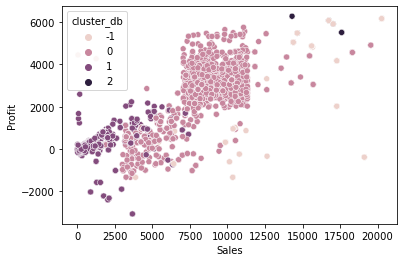

In [81]:
sns.scatterplot(x='Sales',y='Profit',data=data_num,hue='cluster_db')